In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv('London.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['Price'], axis=1)
y = data['Price']


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Area in sq ft'}>],
       [<Axes: title={'center': 'No. of Bedrooms'}>,
        <Axes: title={'center': 'No. of Bathrooms'}>],
       [<Axes: title={'center': 'No. of Receptions'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

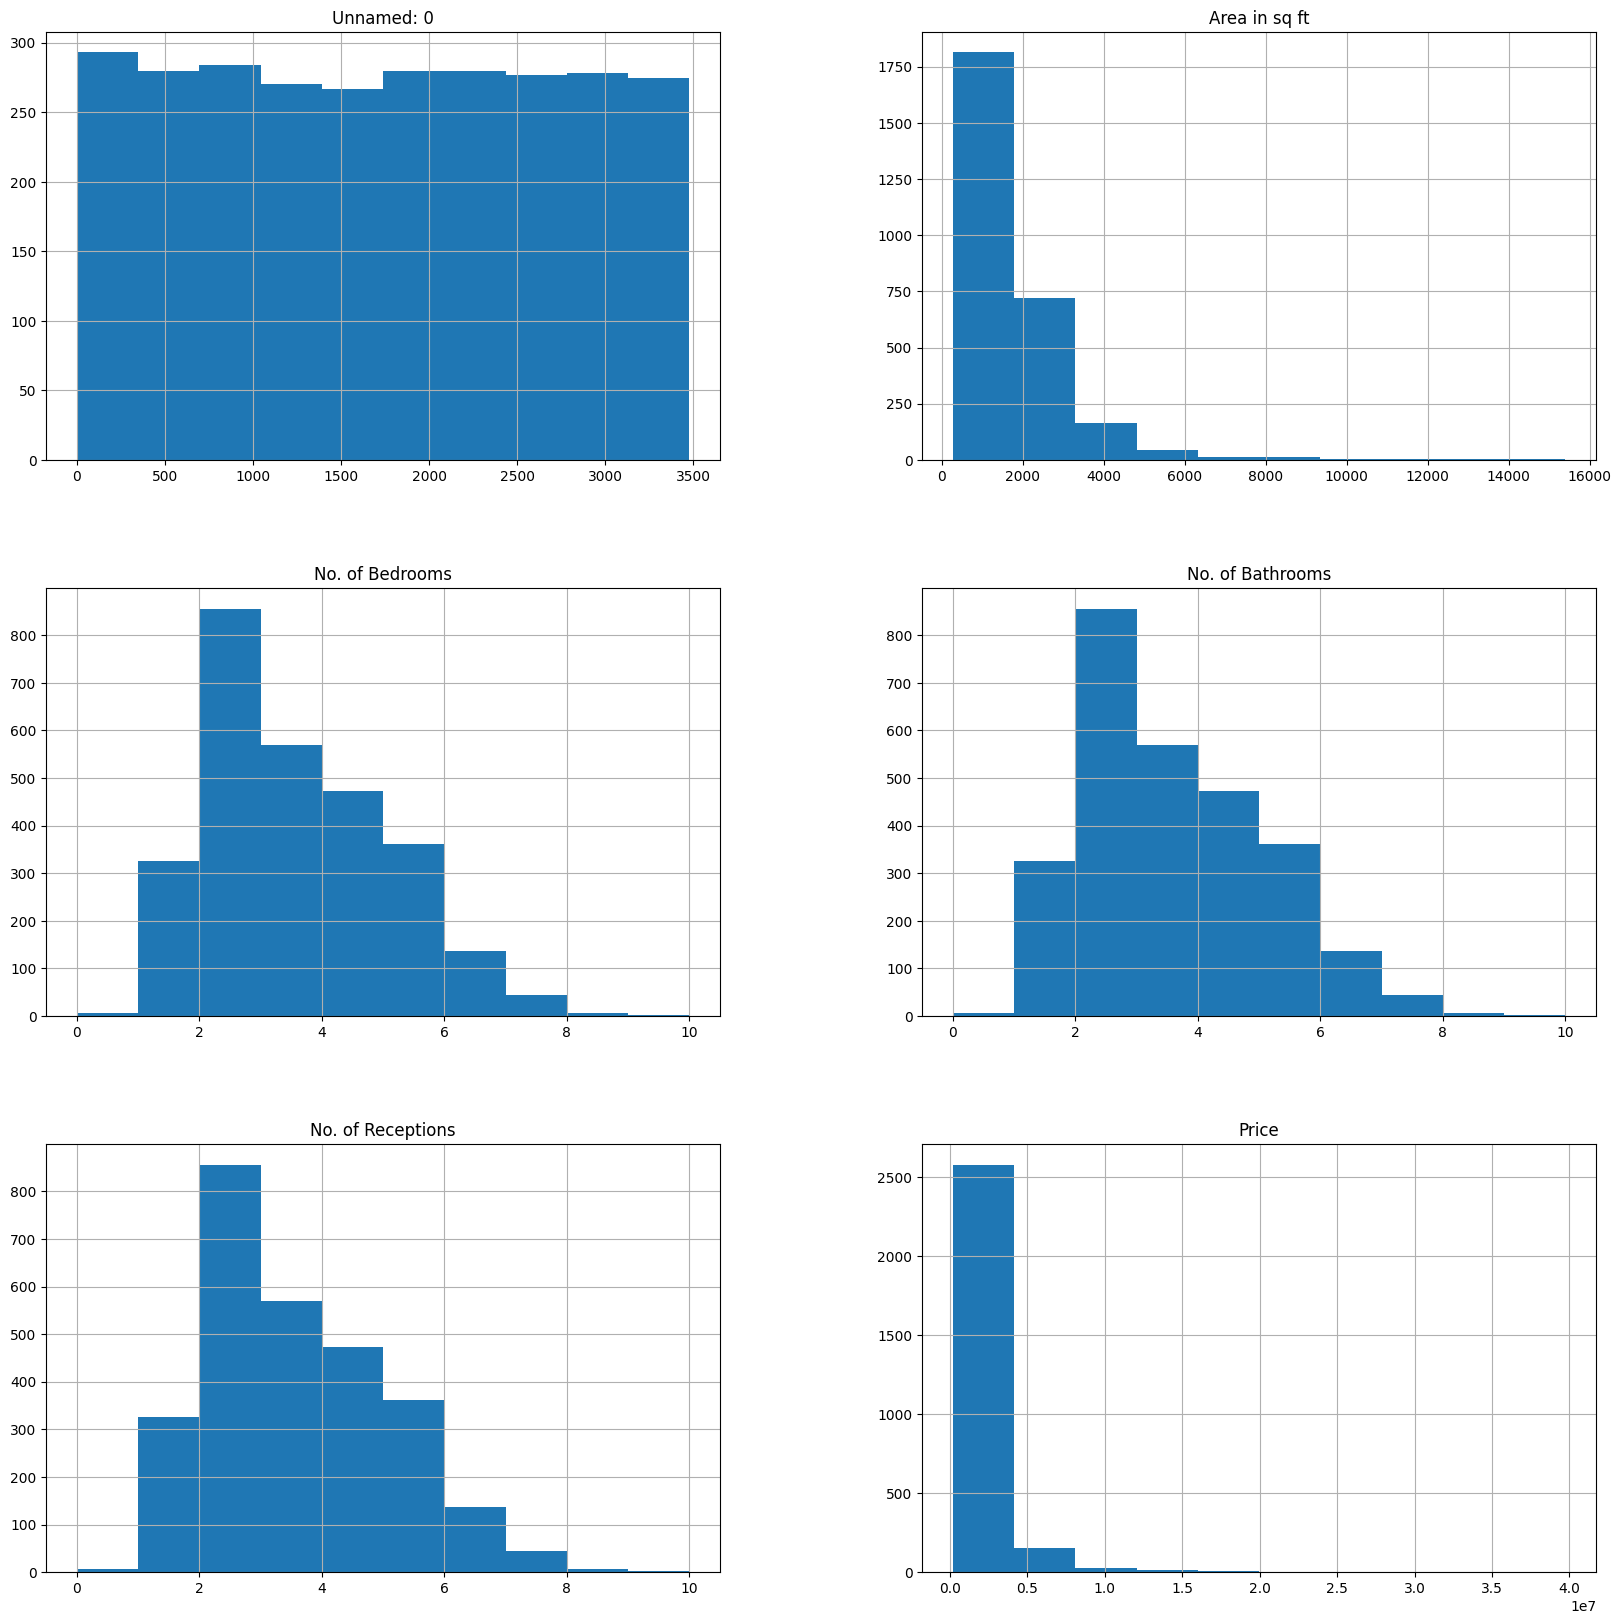

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

training_data = x_train.join(y_train)

training_data.hist(figsize=(20, 20))


<Axes: >

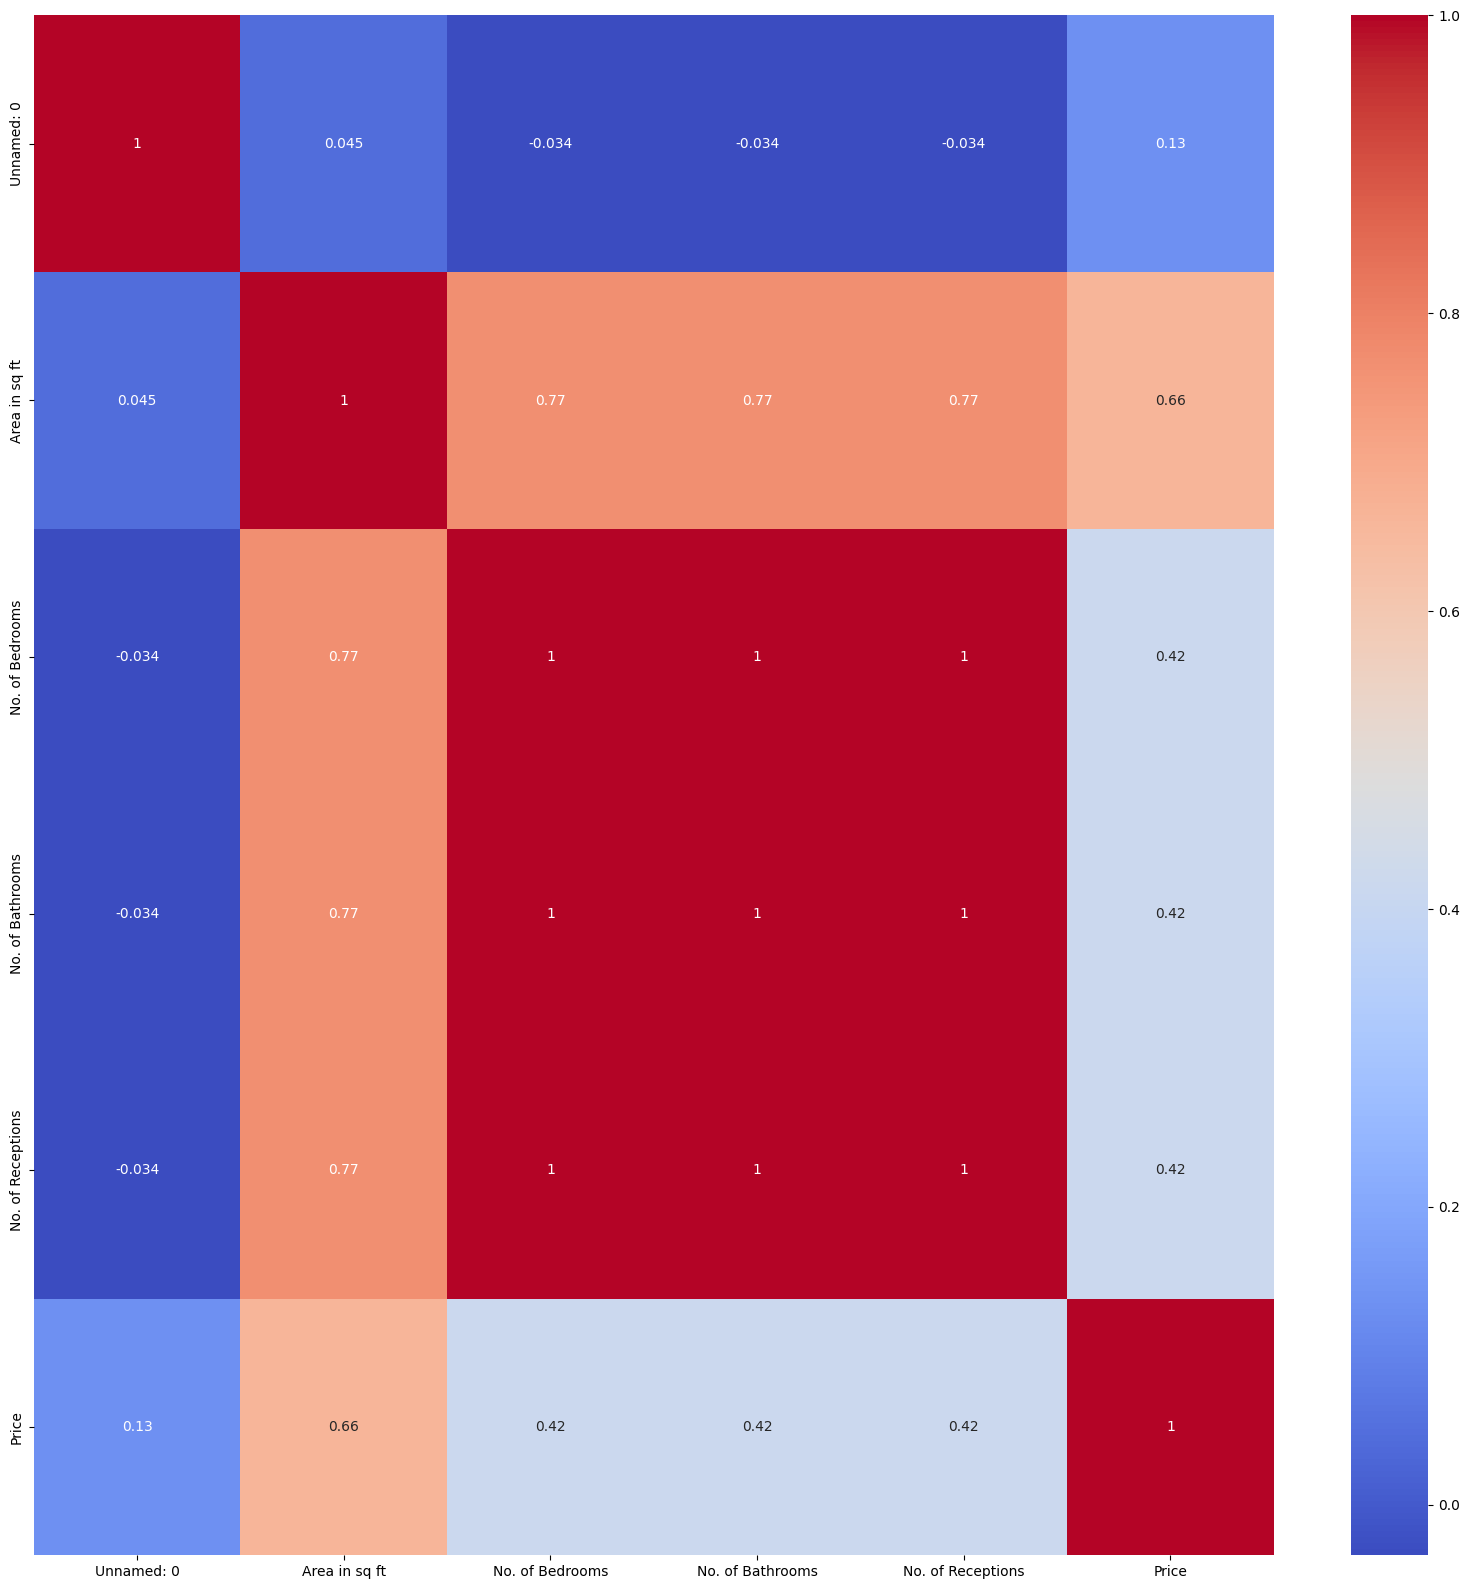

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
training_data = training_data.join(pd.get_dummies(training_data['House Type'])).drop(['House Type'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['Location'])).drop(['Location'], axis=1)
# training_data = training_data.drop(['Location'], axis=1)
# training_data = training_data.join(pd.get_dummies(training_data['City/County'])).drop(['City/County'], axis=1)
training_data['London'] = training_data['City/County'].apply(lambda x: x == 'London').astype('bool')
training_data = training_data.drop(['Location'], axis=1)
training_data = training_data.drop(['Property Name'], axis=1)
training_data = training_data.drop(['City/County'], axis=1)
training_data = training_data.drop(['Postal Code'], axis=1)


# # Drop the original 'City/County' column
# training_data = training_data.drop(['City/County'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 2784 entries, 445 to 2844
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         2784 non-null   int64
 1   Area in sq ft      2784 non-null   int64
 2   No. of Bedrooms    2784 non-null   int64
 3   No. of Bathrooms   2784 non-null   int64
 4   No. of Receptions  2784 non-null   int64
 5   Price              2784 non-null   int64
 6   Bungalow           2784 non-null   bool 
 7   Duplex             2784 non-null   bool 
 8   Flat / Apartment   2784 non-null   bool 
 9   House              2784 non-null   bool 
 10  Mews               2784 non-null   bool 
 11  New development    2784 non-null   bool 
 12  Penthouse          2784 non-null   bool 
 13  Studio             2784 non-null   bool 
 14  London             2784 non-null   bool 
dtypes: bool(9), int64(6)
memory usage: 241.3 KB


<Axes: >

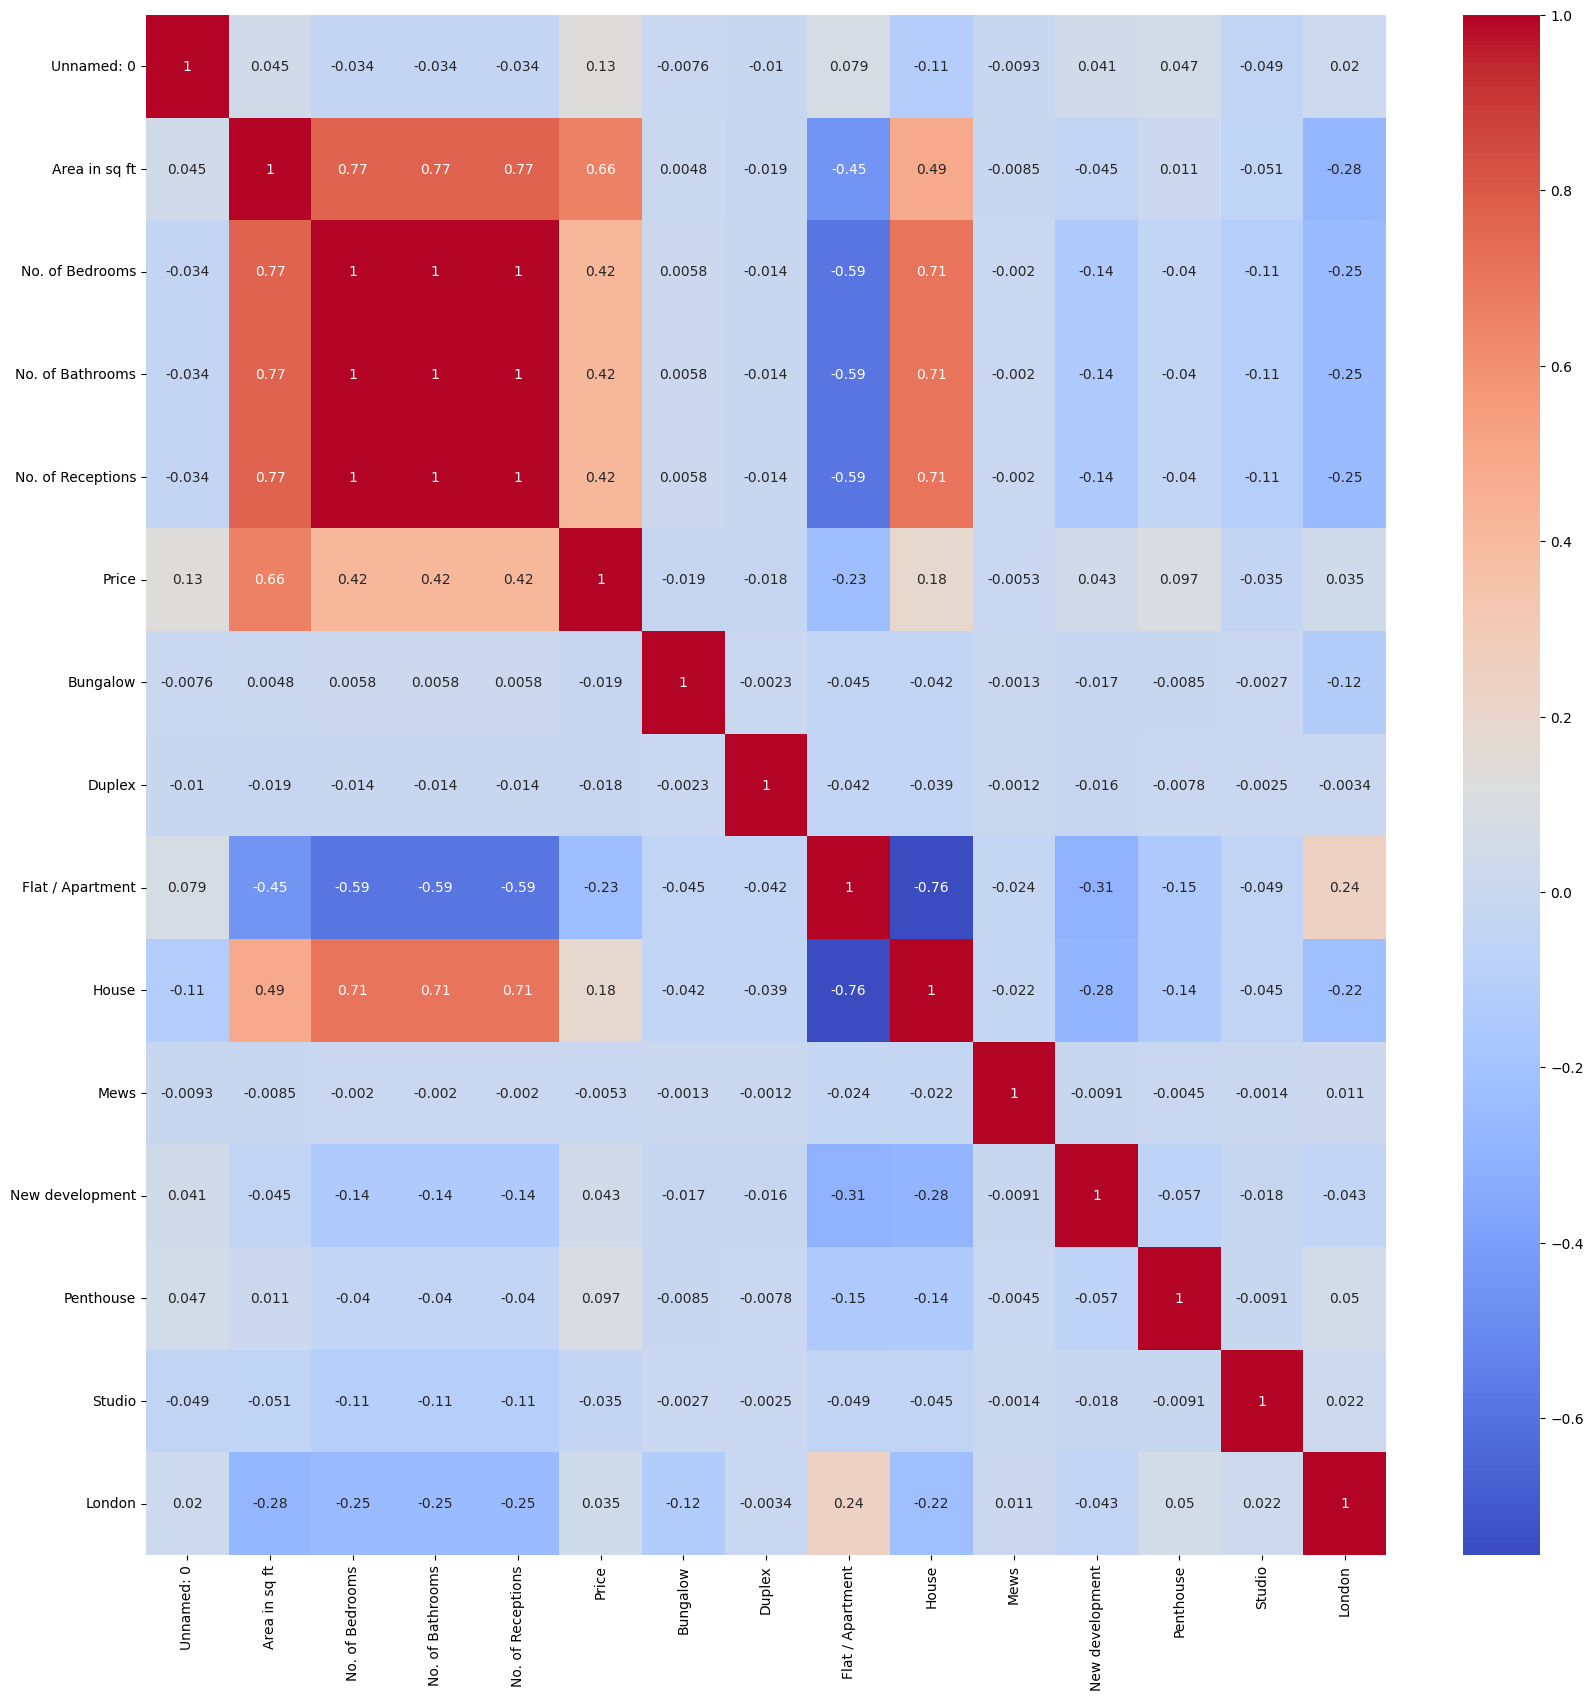

In [ ]:
training_data.info()
plt.figure(figsize=(20, 20))

sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, y_train = training_data.drop(['Price'], axis=1), training_data['Price']


reg = LinearRegression()

reg.fit(x_train, y_train)
reg.score(x_train, y_train)

LinearRegression()

In [ ]:
training_data['Predicted Price'] = reg.predict(x_train)
training_data = training_data.drop(['Predicted Price'], axis=1)
training_data

,Unnamed: 0,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price,Bungalow,Duplex,Flat / Apartment,House,Mews,New development,Penthouse,Studio,London
445,445,770,2,2,2,799950,False,False,True,False,False,False,False,False,True
508,508,690,2,2,2,499000,False,False,False,False,False,True,False,False,True
1580,1580,1407,4,4,4,895000,False,False,False,True,False,False,False,False,True
253,253,1892,4,4,4,1850000,False,False,False,True,False,False,False,False,True
2654,2654,624,2,2,2,775000,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2019,1195,2,2,2,1600000,False,False,False,True,False,False,False,False,True
3254,3254,1690,4,4,4,1000000,False,False,False,True,False,False,False,False,False
1543,1543,1156,3,3,3,1995000,False,False,True,False,False,False,False,False,True
1555,1555,1334,2,2,2,699950,False,False,True,False,False,False,False,False,True
